In [31]:
import pandas as pd
boston = pd.read_csv('boston-housing-dataset.csv')

In [32]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


<AxesSubplot:>

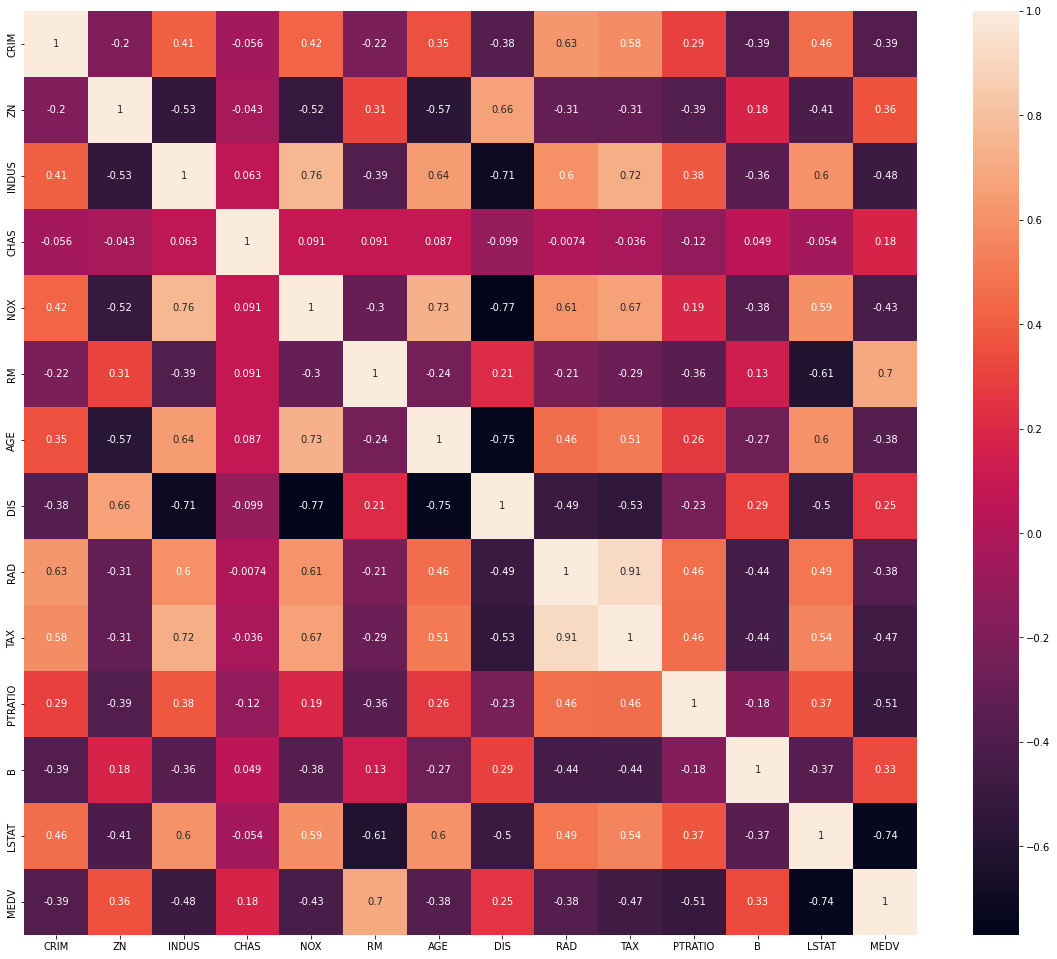

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(20,17))
sns.heatmap(boston.corr(),annot=True)

In [36]:
import numpy as np
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [53]:
y_train_predict = lin_model.predict([[4.98,6.575]])
print('----------PREDICTED VALUE-------------')
print(y_train_predict)
print('----------ACTUAL VALUE----------------')
print(boston.loc[0,'MEDV'])


----------PREDICTED VALUE-------------
[29.3226012]
----------ACTUAL VALUE----------------
24.0


/usr/local/lib64/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [65]:
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rms = (np.sqrt(mean_squared_error(Y_train,y_train_predict)))
print('----------MODEL EVALUATION FOR TRAINING SET ------------')
print(rms)
print(r2_score(Y_train,y_train_predict))

----------MODEL EVALUATION FOR TRAINING SET ------------
5.559137379542155
0.6269881552846376


In [66]:
y_test_predict = lin_model.predict(X_test)
rms = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))
print('----------MODEL EVALUATION FOR TESTING SET ------------')
print(rms)
print(r2_score(Y_test,y_test_predict))

----------MODEL EVALUATION FOR TESTING SET ------------
5.480984819976073
0.6625532561060821
